In [638]:
from sklearn.datasets import load_boston
boston = load_boston()


In [639]:
print(boston.data.shape)

(506, 13)


In [640]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [641]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [642]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [643]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


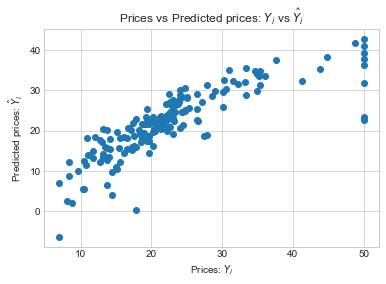

In [644]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
%matplotlib inline
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

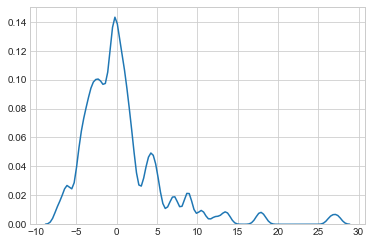

In [645]:
delta_y = Y_test - Y_pred;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()


In [646]:
from sklearn.preprocessing import StandardScaler

In [647]:
def ColumnStandardization(train_data, test_data):
    """ Column standardization to get unit variance.
    with_mean is set to false so that it works for sparse matrix
    """
    standardizer = StandardScaler()
    std_train_data = standardizer.fit_transform(train_data)
    std_test_data = standardizer.transform(test_data)
    return (std_train_data, std_test_data)

In [648]:
def predict_y(test_inputs, w, b):
    """
    Predicts the Y values for the provided test inputs.
    div_vector is the optimal w* 
    div_intercept is the optimal b*
    """
    test_inputs = np.array(test_inputs)
    ret_output = [(np.dot(w,xi) + b) for xi in test_inputs]
        
    return ret_output # return the predicted values

In [649]:
def plot_predictions(predictions):
    plt.scatter(Y_test, predictions)
    plt.xlabel("Prices: $Y_i$")
    plt.ylabel("Predicted prices: $\hat{Y}_i$")
    plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
    plt.show()

In [653]:
def StoichasticGradientDescent(X_train, Y_train, w_current, b_current, num_of_iterations, learning_rate, stoichastic_constant):
    """
    Performs the Gradient descent algorithm.
    X_train -> Train input on which the SGD is run
    Y_train -> Observed outputs for the given X_train
    b_current -> initial Y intercept of the line. b of the y = w.x + b
    w_current -> initial weight vector. w of the y = w.x + b
    learning_rate -> the rate at which the optimum value is achived
    stoichastic_constant -> The number of random inputs to pick from the train data to calculate the intermediate w and b
    """
    for _ in range(num_of_iterations):
        
        # indicies of the randomly picked input values 
        k_indices = random.sample(range(0,339), stoichastic_constant) 
        
        X_samples = np.array([X_train[i] for i in k_indices]) # randomly picked input sample 
        y_samples = np.array([Y_train[i] for i in k_indices]) # randomly picked output of the input sample
        
        y_currents = [(np.dot(w_current, xi) + b_current) for xi in X_samples] # y_current = w.xi + b
        
        # summation of[ (-2) (xi) (yi - w.xi - b) ]
        # summation of[ (-2) (xi) (yi - (w.xi + b)) ]
        # summation of[ (-2) (xi) (yi - y_current) ]
        w_gradient = float(-2) * sum((X_samples.T * (y_samples - y_currents)).T)

        # summation of[ (-2) (yi - w.xi - b) ]
        # summation of[ (-2) (yi - (w.xi + b)) ]
        # summation of[ (-2) (yi - y_current) ]
        b_gradient = float(-2) * sum(y_samples - y_currents) 
        
        # wi+1 = wi - r . dl\dw
        w_current = w_current - (learning_rate * w_gradient)
        
        # bi+1 = bi - r . dl\db
        b_current = b_current - (learning_rate * b_gradient)
            
    return w_current, b_current

In [651]:
import random
train_input, test_input = ColumnStandardization(X_train,X_test)

train_input = np.array(train_input)

train_output = np.array(Y_train)

[-1.36986934  0.78201421 -0.41500137  0.66482854 -1.30219142  3.02631952
 -0.31428005 -2.73325602  2.13724282 -1.24657183 -1.92488459  1.08524094
 -3.28452828]
22.424298826316303


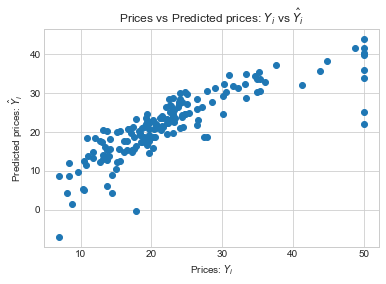

In [654]:
w_star, b_star = StoichasticGradientDescent(train, y, np.zeros(X.shape[1]), 0, 500, 0.001, 20)

print(w_star)
print(b_star)

# prediction using w0 and b0 are optimal vector and intercept
y_expected = predict_y(test, w_star, b_star)

plot_predictions(y_expected)

[-1.03730751  0.48847619 -0.43140205  0.30698059 -0.63986194  3.09816012
 -0.38605481 -1.86780121  0.90877473 -0.44617361 -1.96748346  0.92874207
 -3.17350991]
22.352826233060988


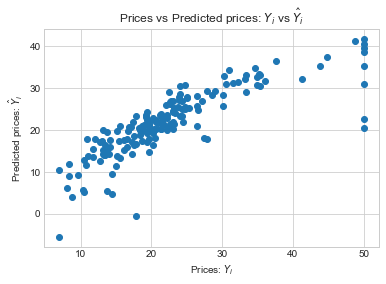

In [655]:
w_star, b_star = StoichasticGradientDescent(train, y, np.zeros(X.shape[1]), 0, 800, 0.0001, 30)

print(w_star)
print(b_star)

# prediction using w0 and b0 are optimal vector and intercept
y_expected = predict_y(test, w_star, b_star)

plot_predictions(y_expected)

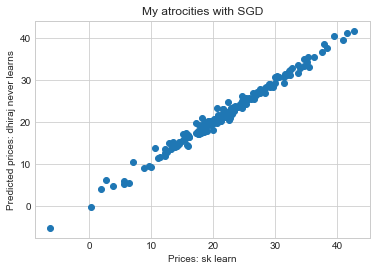

In [657]:
plt.scatter(Y_pred, y_expected)
plt.xlabel("Prices: sk learn")
plt.ylabel("Predicted prices: dhiraj never learns")
plt.title("My atrocities with SGD")
plt.show()

In [658]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [660]:
comparision = [[r2_score(Y_test, Y_pred), r2_score(Y_test, y_expected)],
               [mean_squared_error(Y_test, Y_pred), mean_squared_error(Y_test, y_expected)]]
comp_df = pd.DataFrame(data=comparision, columns=["SK learn", "Dhiraj"])

comp_df.head()

,SK learn,Dhiraj
0,0.695539,0.684726
1,28.541367,29.554995


In [666]:
comparision = {"SK learn" : Y_pred, "Dhiraj" : y_expected}
comp_df = pd.DataFrame(data=comparision)

comp_df.head()

,SK learn,Dhiraj
0,37.467236,36.616170
1,31.391547,29.352734
2,27.120196,26.707366
3,6.468433,5.415143
4,33.629667,33.474465
